<a href="https://colab.research.google.com/github/insaiyancvk/dog-vision/blob/main/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all the required libraries

In [134]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [135]:
breeds = pd.read_csv("breeds.csv")
breeds = np.array(breeds)
unique_breeds = np.unique(breeds)

## Use [this](https://postimages.org/) for uploading *your* dog's picture to a temporary cloud server. Or give any URL which has a dog in it :) 

**Note:** Paste the URL in `custom_url` variable between the double quotes (" ").

In [136]:
custom_url = "https://i.postimg.cc/J0rj53GX/dog-1.jpg"
urllib.request.urlretrieve(custom_url, "1.jpg");

## Gathering all the required functions into one cell.

You don't have to edit anything here.. you can directly jump to the last cell

In [137]:
IMG_SIZE = 224
# preprocessing images
def process_image(image_path, IMG_SIZE=IMG_SIZE):
  """
  Takes an image file path and turns the image into Tensors
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=(IMG_SIZE, IMG_SIZE))
  return image

BATCH_SIZE = 32
# Turn data into batches
def create_data_batches(X, y=None, batch_size= BATCH_SIZE):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input(no labels).
  """
  print("Creating data batches...")
  data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
  data_batch = data.map(process_image).batch(BATCH_SIZE)
  return data_batch

def get_pred_label(prediction_probabilities):
  """
  Turns an array of predction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer": hub.KerasLayer})
  return model

In [138]:
custom_data = create_data_batches(["/content/drive/MyDrive/Git repos/dog-vision/1.jpg"])
model = load_model("20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5")
prediction = model.predict(custom_data)
prediction_label = [get_pred_label(prediction[i]) for i in range(len(prediction))]

Creating data batches...
Loading saved model from: 20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5


In [139]:
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)
img = custom_images[0]

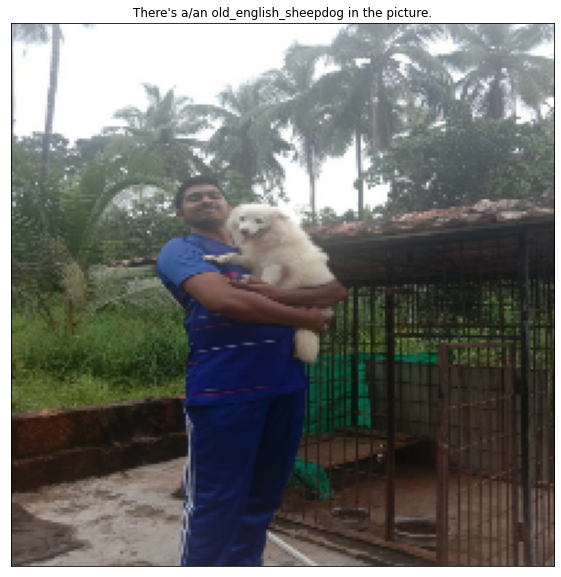

In [140]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.title("There's a/an "+prediction_label[0]+" in the picture.")
plt.imshow(img);

In [142]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	1.jpg
	20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5
	Dog Vision.ipynb
	breeds.csv

nothing added to commit but untracked files present (use "git add" to track)


In [143]:
!git add .

In [146]:
!git commit -m "the working code"

[main e5f40fc] the working code
 4 files changed, 10224 insertions(+)
 create mode 100644 1.jpg
 create mode 100644 20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5
 create mode 100644 Dog Vision.ipynb
 create mode 100644 breeds.csv


In [145]:
|!git config --global user.email "cvamshik1@gmail.com"
!git config --global user.name "insaiyancvk"

In [148]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
